In [1052]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
from bs4 import BeautifulSoup as BS
from datetime import datetime
from bson.json_util import dumps
import json
pd.options.display.max_columns = None
from bson import json_util
import os
from pandas.io.json import json_normalize

from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn import cross_validation
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [597]:
import boxofficemojoAPI as bom


In [3]:
#####
box_office_mojo = bom.BoxOfficeMojo()
box_office_mojo.crawl_for_urls()


Processing letter: NUM
Processing letter: A
Processing letter: B
Processing letter: C
Processing letter: D
Processing letter: E
Processing letter: F
Processing letter: G
Processing letter: H
Processing letter: I
Processing letter: J
Processing letter: K
Processing letter: L
Processing letter: M
Processing letter: N
Processing letter: O
Processing letter: P
Processing letter: Q
Processing letter: R
Processing letter: S
Processing letter: T
Processing letter: U
Processing letter: V
Processing letter: W
Processing letter: X
Processing letter: Y
Processing letter: Z


In [225]:
movie = box_office_mojo.get_movie_summary("titanic")
movie.clean_data()
print movie.to_json()
movie2 = box_office_mojo.get_movie_summary("quest")
movie2.clean_data()

{
    "actors": [
        "Leonardo DiCaprio", 
        "Kate Winslet", 
        "Billy Zane", 
        "Kathy Bates", 
        "Bill Paxton", 
        "Bernard Hill", 
        "Ioan Gruffudd"
    ], 
    "composers": [
        "James Horner"
    ], 
    "directors": [
        "James Cameron"
    ], 
    "distributor": "Paramount", 
    "domestic": 658672302.0, 
    "foreign": 1528100000.0, 
    "genre": "Romance", 
    "mpaa_rating": "PG-13", 
    "producers": [
        "Jon Landau"
    ], 
    "production_budget": 200000000.0, 
    "release_date": {
        "$date": 882489600000
    }, 
    "runtime": 194, 
    "title": "Titanic (1997)", 
    "worldwide": 2186772302.0, 
    "writers": [
        "James Cameron"
    ]
}


In [226]:
weekly = box_office_mojo.get_weekly_summary("titanic")
weekly.clean_data()
print weekly.to_json()
weekly2 = box_office_mojo.get_weekly_summary("quest")
weekly2.clean_data()

{
    "title": "Titanic (1997)", 
    "weekly": [
        {
            "average_per_theatre": 19539.0, 
            "gross": 52969336.0, 
            "gross_to_date": 52969336.0, 
            "rank": 1, 
            "theaters": 2711, 
            "theatre_change": null, 
            "week": {
                "$date": 882489600000
            }, 
            "week_number": 1, 
            "week_over_week_change": null
        }, 
        {
            "average_per_theatre": 26257.0, 
            "gross": 71183357.0, 
            "gross_to_date": 124152693.0, 
            "rank": 1, 
            "theaters": 2711, 
            "theatre_change": null, 
            "week": {
                "$date": 883094400000
            }, 
            "week_number": 2, 
            "week_over_week_change": 0.344
        }, 
        {
            "average_per_theatre": 16506.0, 
            "gross": 45012810.0, 
            "gross_to_date": 169165503.0, 
            "rank": 1, 
            "theaters": 

In [1379]:
box_office_mojo.movie_urls

{'turntheriver': 'Turn the River',
 'shinealight': 'Shine a Light',
 'reds': 'Reds',
 'theri(thespark)': 'Theri (The Spark)',
 'talkingdirtyafterdark': 'Talking Dirty After Dark',
 'ipman2': 'Ip Man 2: Legend of the Grandmaster',
 '20000daysonearth': '20,000 Days on Earth',
 'hannaswar': "Hanna's War",
 'womaninblack2': 'The Woman in Black 2: Angel of Death',
 'triptoitaly': 'The Trip to Italy',
 'nationalgallery': 'National Gallery',
 'tusk': 'Tusk',
 'mirage': 'Mirage',
 'conjuring': 'The Conjuring',
 'inthepit': 'In the Pit',
 'redacted': 'Redacted',
 'juliuscaesar': 'Julius Caesar',
 'goldenbowl': 'The Golden Bowl',
 'gabrielle': 'Gabrielle',
 'goldfinger': 'Goldfinger',
 'stayingtogether': 'Staying Together',
 'ashesoftimeredux': 'Ashes of Time Redux',
 'saltoflife': 'The Salt of Life',
 'pardon': 'The Pardon',
 'mapoftheworld': 'A Map of the World',
 'hollywooddreams': 'Hollywood Dreams',
 'lonelymaiden': 'The Lonely Maiden',
 'tabhunterconfidential': 'Tab Hunter Confidential',
 

In [8]:
type(box_office_mojo.movie_urls)

dict

In [87]:
for moviename in box_office_mojo.movie_urls.iterkeys():
    print moviename

turntheriver
shinealight
reds
theri(thespark)
talkingdirtyafterdark
ipman2
20000daysonearth
hannaswar
womaninblack2
triptoitaly
nationalgallery
tusk
mirage
conjuring
inthepit
redacted
juliuscaesar
goldenbowl
gabrielle
goldfinger
stayingtogether
ashesoftimeredux
saltoflife
pardon
mapoftheworld
hollywooddreams
lonelymaiden
tabhunterconfidential
soapdish
houseattheendofthestreet
shadowdancer
posterboy
lore
hermano
herbdorothy
steakrevolution
mrandmrsbridge
hostel2
formosabetrayed
asomewhatgentleman
saltofthesea
oceans
speakingparts
pandoraspromise
hauntedworldedwood
trainoflife
housemaid
madhouse
justmyluck
fur
theboyandthebeast
christophercolumbus
killingkasztner
hardtohold
fatkidrulestheworld
prize
notorious
lifeissweet
guesswho
blingring
woods
northcountry
moneyfornothing13
youngphiladelphians
homannjahaan
lastparty
stopovertokyo
fiveeasypieces
undead
tunnel11
grossepointeblank
fraulein
winterinwartime
chrisnolan2017
pulse
tcmnextgeneration
sixstringsamurai
noregret
valiant
bestman2
le

In [35]:
movie.data

{'_id': ObjectId('576c2975b2537a2a42d74234'),
 u'actors': ['Leonardo DiCaprio',
  'Kate Winslet',
  'Billy Zane',
  'Kathy Bates',
  'Bill Paxton',
  'Bernard Hill',
  'Ioan Gruffudd'],
 u'composers': ['James Horner'],
 u'directors': ['James Cameron'],
 'distributor': 'Paramount',
 'domestic': 658672302.0,
 'foreign': 1528100000.0,
 'genre': 'Romance',
 'mpaa_rating': 'PG-13',
 u'producers': ['Jon Landau'],
 'production_budget': 200000000.0,
 'release_date': datetime.datetime(1997, 12, 19, 0, 0),
 'runtime': 194,
 'title': 'Titanic (1997)',
 'worldwide': 2186772302.0,
 u'writers': ['James Cameron']}

In [44]:
weekly.data

{'title': 'Titanic (1997)',
 'weekly': [{'average_per_theatre': 19539.0,
   'gross': 52969336.0,
   'gross_to_date': 52969336.0,
   'rank': 1,
   'theaters': 2711,
   'theatre_change': None,
   'week': datetime.datetime(1997, 12, 19, 0, 0),
   'week_number': 1,
   'week_over_week_change': None},
  {'average_per_theatre': 26257.0,
   'gross': 71183357.0,
   'gross_to_date': 124152693.0,
   'rank': 1,
   'theaters': 2711,
   'theatre_change': None,
   'week': datetime.datetime(1997, 12, 26, 0, 0),
   'week_number': 2,
   'week_over_week_change': 0.344},
  {'average_per_theatre': 16506.0,
   'gross': 45012810.0,
   'gross_to_date': 169165503.0,
   'rank': 1,
   'theaters': 2727,
   'theatre_change': 16,
   'week': datetime.datetime(1998, 1, 2, 0, 0),
   'week_number': 3,
   'week_over_week_change': -0.368},
  {'average_per_theatre': 13681.0,
   'gross': 37568867.0,
   'gross_to_date': 206734370.0,
   'rank': 1,
   'theaters': 2746,
   'theatre_change': 19,
   'week': datetime.datetime(199

In [50]:
type(movie.to_json())

str

In [60]:
df1 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in movie.data.iteritems() ]))

In [63]:
df1.drop(df1.index[1:])

,_id,actors,composers,directors,distributor,domestic,foreign,genre,mpaa_rating,producers,production_budget,release_date,runtime,title,worldwide,writers
0,576c2975b2537a2a42d74234,Leonardo DiCaprio,James Horner,James Cameron,Paramount,658672302.0,1.528100e+09,Romance,PG-13,Jon Landau,200000000.0,1997-12-19,194.0,Titanic (1997),2.186772e+09,James Cameron


In [68]:
df2 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in weekly.data['weekly'][0].iteritems() ]))

In [72]:
df2

,average_per_theatre,gross,gross_to_date,rank,theaters,theatre_change,week,week_number,week_over_week_change,gross2
0,19539.0,52969336.0,52969336.0,1,2711,NaN,1997-12-19,1,NaN,71183357.0


In [71]:
df2['gross2'] = weekly.data['weekly'][1]['gross']

In [73]:
df = pd.concat([df1,df2],axis = 1)

In [105]:
dfall = df.ix[0:0]

In [113]:
i = 0

for moviename in box_office_mojo.movie_urls.iterkeys():
    i += 1
    movie = box_office_mojo.get_movie_summary(moviename)
    movie.clean_data()
    weekly = box_office_mojo.get_weekly_summary(moviename)
    weekly.clean_data()
    df1 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in movie.data.iteritems() ]))
    if len(weekly.data['weekly']) >= 2:
        df2 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in weekly.data['weekly'][0].iteritems() ]))
        df2['gross2'] = weekly.data['weekly'][1]['gross']
        df12 = pd.concat([df1,df2],axis = 1)
        dfall = pd.concat([dfall,df12.ix[0:0]],axis=0)
    if i == 1000:
        break
    
    

Error parsing movie:  Box Office Mojo - Movie Index, A-Z


AttributeError: 'NoneType' object has no attribute 'findAll'

In [111]:
dfall

,_id,actors,average_per_theatre,cinematographers,composers,directors,distributor,domestic,foreign,genre,gross,gross2,gross_to_date,mpaa_rating,producers,production_budget,rank,release_date,runtime,theaters,theatre_change,title,week,week_number,week_over_week_change,worldwide,writers
0,576c2975b2537a2a42d74234,Leonardo DiCaprio,19539.0,NaN,James Horner,James Cameron,Paramount,658672302.0,1.528100e+09,Romance,52969336.0,71183357.0,52969336.0,PG-13,Jon Landau,200000000.0,1.0,1997-12-19,194.0,2711.0,NaN,Titanic (1997),1997-12-19,1.0,NaN,2.186772e+09,James Cameron
0,NaN,Famke Janssen,2722.0,NaN,NaN,NaN,Screen Media,5149.0,NaN,Drama,2722.0,2427.0,2722.0,R,NaN,NaN,117.0,2008-05-09,92.0,1.0,NaN,Turn the River (2008),2008-05-09,1.0,NaN,NaN,NaN
0,NaN,NaN,6982.0,Stuart Dryburgh,NaN,Martin Scorsese,Paramount Vantage,5505267.0,1.026808e+07,Documentary,1926961.0,1261082.0,1926961.0,PG-13,NaN,NaN,15.0,2008-04-04,122.0,276.0,NaN,Shine a Light (2008),2008-04-04,1.0,NaN,1.577335e+07,NaN
0,NaN,Warren Beatty,9785.0,Vittorio Storaro,NaN,NaN,Paramount,40382659.0,NaN,Historical Drama,3875048.0,3045964.0,3875048.0,PG,NaN,32000000.0,1.0,1981-12-04,194.0,396.0,NaN,Reds (1981),1981-12-04,1.0,NaN,NaN,NaN
0,NaN,Donnie Yen,4006.0,NaN,NaN,NaN,Variance Films,205675.0,1.485613e+07,Foreign / Action,80121.0,48216.0,80121.0,R,NaN,NaN,44.0,2011-01-28,107.0,20.0,NaN,Ip Man 2: Legend of the Grandmaster (2011),2011-01-28,1.0,NaN,1.506180e+07,NaN
0,NaN,NaN,3090.0,NaN,NaN,NaN,Drafthouse,279558.0,1.826000e+06,Documentary,3090.0,36421.0,3090.0,Unrated,NaN,NaN,106.0,2014-09-17,97.0,1.0,NaN,"20,000 Days on Earth (2014)",2014-09-12,0.0,NaN,2.105558e+06,NaN
0,NaN,Jeremy Irvine,6729.0,NaN,NaN,NaN,Relativity,26501323.0,2.235298e+07,Horror,17509105.0,5678468.0,17509105.0,PG-13,Ryan Kavanaugh,NaN,4.0,2015-01-02,98.0,2602.0,NaN,The Woman in Black 2: Angel of Death (2015),2015-01-02,1.0,NaN,4.885430e+07,NaN
0,NaN,Steve Coogan,35760.0,NaN,NaN,Michael Winterbottom,IFC,2880537.0,3.049000e+06,Comedy,107280.0,154027.0,107280.0,Unrated,NaN,NaN,38.0,2014-08-15,NaN,3.0,NaN,The Trip to Italy (2014),2014-08-15,1.0,NaN,5.929537e+06,NaN
0,NaN,NaN,3115.0,NaN,NaN,NaN,Zipporah Films,253941.0,NaN,Documentary,3115.0,16221.0,3116.0,Unrated,NaN,NaN,97.0,2014-11-05,183.0,1.0,NaN,National Gallery (2014),2014-10-31,0.0,NaN,NaN,NaN
0,NaN,Justin Long,1885.0,NaN,NaN,Kevin Smith,A24,1826705.0,NaN,Horror,1134536.0,428079.0,1134536.0,R,NaN,NaN,14.0,2014-09-19,102.0,602.0,NaN,Tusk (2014),2014-09-19,1.0,NaN,1.826705e+06,Kevin Smith


In [127]:
X = dfall[['average_per_theatre','domestic','gross','rank','runtime','theaters']]
X = X.fillna(0)

In [128]:
y = dfall['gross2']
y = y.fillna(0)

In [135]:

# linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
regr = linear_model.LinearRegression()

In [137]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
regr.score(X_test,y_test)

0.93361528848594444

In [190]:
# combine all the json strings

i = 0
for moviename in box_office_mojo.movie_urls.iterkeys():
    
    movie = box_office_mojo.get_movie_summary(moviename)
    movie.clean_data()
    #weekly = box_office_mojo.get_weekly_summary(moviename)
    #weekly.clean_data()
    df = pd.read_json(movie.to_json())
    dfall = pd.concat([dfall,df])
    i += 1
    print i


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [192]:
dfall = pd.read_json(movie.to_json())

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [189]:
dfall

,distributor,domestic,foreign,genre,mpaa_rating,production_budget,release_date,runtime,title,worldwide
$date,Regent Releasing,62062,NaN,Drama,R,NaN,1155254400000,98,Posterboy (2006),NaN


In [207]:
movie.data

{u'actors': ['Leonardo DiCaprio',
  'Kate Winslet',
  'Billy Zane',
  'Kathy Bates',
  'Bill Paxton',
  'Bernard Hill',
  'Ioan Gruffudd'],
 u'composers': ['James Horner'],
 u'directors': ['James Cameron'],
 'distributor': 'Paramount',
 'domestic': 658672302.0,
 'foreign': 1528100000.0,
 'genre': 'Romance',
 'mpaa_rating': 'PG-13',
 u'producers': ['Jon Landau'],
 'production_budget': 200000000.0,
 'release_date': datetime.datetime(1997, 12, 19, 0, 0),
 'runtime': 194,
 'title': 'Titanic (1997)',
 'worldwide': 2186772302.0,
 u'writers': ['James Cameron']}

In [201]:
movie.to_json()

'{\n    "actors": [\n        "Famke Janssen"\n    ], \n    "distributor": "Screen Media", \n    "domestic": 5149.0, \n    "foreign": null, \n    "genre": "Drama", \n    "mpaa_rating": "R", \n    "production_budget": null, \n    "release_date": {\n        "$date": 1210291200000\n    }, \n    "runtime": 92, \n    "title": "Turn the River (2008)", \n    "worldwide": null\n}'

In [219]:
data = json.dumps(movie.data, indent=4, sort_keys=True, default=json_util.default)

In [220]:
data

'{\n    "actors": [\n        "Leonardo DiCaprio", \n        "Kate Winslet", \n        "Billy Zane", \n        "Kathy Bates", \n        "Bill Paxton", \n        "Bernard Hill", \n        "Ioan Gruffudd"\n    ], \n    "composers": [\n        "James Horner"\n    ], \n    "directors": [\n        "James Cameron"\n    ], \n    "distributor": "Paramount", \n    "domestic": 658672302.0, \n    "foreign": 1528100000.0, \n    "genre": "Romance", \n    "mpaa_rating": "PG-13", \n    "producers": [\n        "Jon Landau"\n    ], \n    "production_budget": 200000000.0, \n    "release_date": {\n        "$date": 882489600000\n    }, \n    "runtime": 194, \n    "title": "Titanic (1997)", \n    "worldwide": 2186772302.0, \n    "writers": [\n        "James Cameron"\n    ]\n}'

In [221]:
parsed_json = json.loads(data)

In [224]:
parsed_json

{u'actors': [u'Leonardo DiCaprio',
  u'Kate Winslet',
  u'Billy Zane',
  u'Kathy Bates',
  u'Bill Paxton',
  u'Bernard Hill',
  u'Ioan Gruffudd'],
 u'composers': [u'James Horner'],
 u'directors': [u'James Cameron'],
 u'distributor': u'Paramount',
 u'domestic': 658672302.0,
 u'foreign': 1528100000.0,
 u'genre': u'Romance',
 u'mpaa_rating': u'PG-13',
 u'producers': [u'Jon Landau'],
 u'production_budget': 200000000.0,
 u'release_date': {u'$date': 882489600000},
 u'runtime': 194,
 u'title': u'Titanic (1997)',
 u'worldwide': 2186772302.0,
 u'writers': [u'James Cameron']}

In [235]:
with open('result.json', 'w') as fp:
    json.dump(movie.data, fp,default=json_util.default)

In [239]:
df = pd.read_json('result.json')

In [240]:
df

,actors,composers,directors,distributor,domestic,foreign,genre,mpaa_rating,producers,production_budget,release_date,runtime,title,worldwide,writers
$date,Leonardo DiCaprio,James Horner,James Cameron,Paramount,658672302,1528100000,Romance,PG-13,Jon Landau,200000000,882489600000,194,Titanic (1997),2186772302,James Cameron


In [248]:
def append_record(record):
    with open('my_file', 'a') as f:
        json.dump(record, f,indent=4, sort_keys=True, default=json_util.default)
        f.write(os.linesep)

# for i in range(10):
#     my_dict = {'number':i}
#     append_record(my_dict)
    
# with open('my_file') as f:
#     my_list = [json.loads(line) for line in f]        

In [321]:
# put info to json file

i= 0

for moviename in box_office_mojo.movie_urls.iterkeys():
    i += 1
    movie = box_office_mojo.get_movie_summary(moviename)
    movie.clean_data()
    
    
    weekly = box_office_mojo.get_weekly_summary(moviename)
    weekly.clean_data()
#     df1 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in movie.data.iteritems() ]))
    if len(weekly.data['weekly']) >= 2:
#         df2 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in weekly.data['weekly'][0].iteritems() ]))
#         df2['gross2'] = weekly.data['weekly'][1]['gross']
#         df12 = pd.concat([df1,df2],axis = 1)
#         dfall = pd.concat([dfall,df12.ix[0:0]],axis=0)
        for k,v in movie.data.iteritems():
            if type(v) == list:
                movie.data[k] = ','.join(v)
        dict1=movie.data.copy()     
        dict2=weekly.data['weekly'][0]
        dict1.update(dict2)
        dict1['gross2'] = weekly.data['weekly'][1]['gross']
        append_record(dict1)
    
    if i == 1:
        break
        

In [281]:
pd.read_json('my_file')

,actors,average_per_theatre,distributor,domestic,foreign,genre,gross,gross2,gross_to_date,mpaa_rating,production_budget,rank,release_date,runtime,theaters,theatre_change,title,week,week_number,week_over_week_change,worldwide
$date,Famke Janssen,2722,Screen Media,5149,NaN,Drama,2722,2427,2722,R,NaN,117,1210291200000,92,1,NaN,Turn the River (2008),1210291200000,1,NaN,NaN


In [603]:
#####
# from dict to dataframe
i= 0
j = 0

for moviename in box_office_mojo.movie_urls.iterkeys():
    
    movie = box_office_mojo.get_movie_summary(moviename)
    movie.clean_data()
    if movie.data['title'] in dfall['title'].values:
        j +=1
        if j % 20 ==0:
            print 'rows passed  ' , j
        continue
    
    weekly = box_office_mojo.get_weekly_summary(moviename)
    weekly.clean_data()

    if len(weekly.data['weekly']) >= 2:
        for k,v in movie.data.iteritems():
            if type(v) == list:
                movie.data[k] = ','.join(v)
        dict1=movie.data.copy()     
        dict2=weekly.data['weekly'][0]
        dict1.update(dict2)
        dict1['gross2'] = weekly.data['weekly'][1]['gross']
        
        df1 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in dict1.iteritems() ]))
        dfall = pd.concat([df1,dfall],axis=0,ignore_index=True)
#         df2 = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in weekly.data['weekly'][0].iteritems() ]))
#         df2['gross2'] = weekly.data['weekly'][1]['gross']
#         df12 = pd.concat([df1,df2],axis = 1)
#         dfall = pd.concat([dfall,df12.ix[0:0]],axis=0)
#        append_record(dict1)
    
        i += 1
    if i%20 == 0 and i>1 :
        print 'rows in =',i
    
    if i == 2000:
        break

rows passed   20
rows passed   40
rows passed   60
rows passed   80
rows passed   100
rows passed   120
rows passed   140
rows passed   160
rows passed   180
rows passed   200
rows passed   220
rows passed   240
rows passed   260
rows passed   280
rows passed   300
rows passed   320
rows passed   340
rows passed   360
rows passed   380
rows passed   400
rows passed   420
rows passed   440
rows passed   460
rows passed   480
rows passed   500
rows passed   520
rows passed   540
rows passed   560
rows passed   580
rows passed   600
rows passed   620
rows passed   640
rows passed   660
rows passed   680
rows passed   700
rows passed   720
rows passed   740
rows passed   760
rows passed   780
rows passed   800
rows passed   820
rows passed   840
rows passed   860
rows passed   880
rows passed   900
rows passed   920
rows passed   940
rows in = 20
rows in = 40
rows in = 40
rows in = 60
rows in = 80
rows in = 100
rows in = 120
rows in = 120
rows in = 140
rows in = 160
rows in = 160
rows in =

In [713]:
#####
# get weekly total 

weeklysum={}
for moviename in box_office_mojo.movie_urls.iterkeys():
    
#     movie = box_office_mojo.get_movie_summary(moviename)
#     movie.clean_data()
#     if movie.data['title'] in dfall['title'].values:
#         continue
    
    weekly = box_office_mojo.get_weekly_summary(moviename)
    weekly.clean_data()
    
    if weekly.data['title'] in dfall['title'].values:
        for dic in weekly.data['weekly']:
            if dic['week'] in weeklysum.keys():
                weeklysum[dic['week']] += dic['gross']
            else:
                weeklysum[dic['week']] = dic['gross']
    

KeyboardInterrupt: 

In [773]:
dfweeklysum = pd.DataFrame(weeklysum.items(),columns=['week','sum'])
dfweeklysum['weekstr'] = dfweeklysum['week'].map(lambda x : x.strftime('%Y-%m-%d'))

In [754]:
######  get weekly ratio


In [738]:
dfratio = dfall[['gross']]
dfratio['ratio'] = 0

/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [775]:
for index, row in dfratio.iterrows():
    if row['gross'] == 0:
        continue
    
#     if dfall.get_value(index,'week') in [dfweeklysum['weekstr']]:
        
#         x = 1
#         dfratio.set_value(index,'ratio',x)

    if dfweeklysum.applymap(lambda x: x == dfall.get_value(index,'week')).any().any():
    
        dfratio.set_value(index,'ratio',1)



AttributeError: 'Series' object has no attribute 'applymap'

In [847]:
dfall.groupby(['mpaa_rating']).count()

,actors,average_per_theatre,cinematographers,composers,directors,distributor,domestic,foreign,genre,gross,gross2,gross_to_date,producers,production_budget,rank,release_date,release_year,runtime,theaters,theatre_change,title,week,week_number,week_over_week_change,worldwide,writers
mpaa_rating,,,,,,,,,,,,,,,,,,,,,,,,,,
G,75,75,75,75,75,75,75,35,75,75,75,75,75,75,74,75,75,74,75,1,75,75,75,0,39,17
NC-17,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,0,3,2
Not Yet Rated,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0
PG,376,376,376,376,376,376,376,168,376,376,376,376,376,376,371,376,376,375,376,0,376,376,376,0,192,109
PG-13,653,653,653,653,653,653,653,435,653,653,653,653,653,653,648,653,653,648,653,2,653,653,653,0,468,271
R,1056,1056,1056,1056,1056,1056,1056,542,1056,1056,1056,1055,1056,1056,1040,1056,1056,1047,1056,4,1056,1055,1055,0,657,340
Unrated,781,781,781,781,781,781,781,214,781,781,781,781,781,781,741,781,781,733,781,1,781,781,781,0,365,26


In [838]:
#dfall.to_csv('dfall.csv', sep='\t', encoding='utf-8',index = False)
dfall.head()

,actors,average_per_theatre,cinematographers,composers,directors,distributor,domestic,foreign,genre,gross,gross2,gross_to_date,mpaa_rating,producers,production_budget,rank,release_date,release_year,runtime,theaters,theatre_change,title,week,week_number,week_over_week_change,worldwide,writers
0,Billy Bob Thornton,4659.028484,,Stephen Trask,,First Look,1.445289e+05,NaN,Drama,2.744795e+04,4.497560e+04,15356.0,R,,0.0,80.0,2005-04-08,2005,120.0,4.0,NaN,Chrystal (2005),2005-04-08,1.0,NaN,NaN,NaN
1,"Ethan Hawke,Robin Williams",145125.126815,,,Peter Weir,Buena Vista,6.694396e+08,140000000.0,Drama,4.241774e+06,8.907394e+07,607399.0,PG,,0.0,14.0,1989-06-02,1989,128.0,8.0,NaN,Dead Poets Society (1989),1989-06-02,1.0,NaN,235860116.0,NaN
2,Penelope Cruz,10194.000000,,,,Oscilloscope Pictures,4.725800e+04,1090163.0,Drama,1.019400e+04,2.347800e+04,10194.0,Not Yet Rated,,0.0,68.0,2016-05-20,2016,111.0,1.0,NaN,Ma ma (2016),2016-05-20,1.0,NaN,1137421.0,NaN
3,,14980.140713,,,,MGM,9.669816e+07,NaN,Unknown,5.047463e+07,3.038392e+07,3745525.0,R,,0.0,2.0,1983-03-11,1983,103.0,595.0,NaN,10 to Midnight (1983),1983-03-11,1.0,NaN,NaN,NaN
4,,0.000000,,,,Sony Classics,2.640002e+05,NaN,Unknown,7.311099e+03,1.211773e+05,3050.0,PG-13,,0.0,57.0,2001-07-06,2001,112.0,1.0,NaN,The Vertical Ray of the Sun (2001),2001-06-29,0.0,NaN,110134.0,NaN


In [672]:
#######   fill na
dfall['cinematographers'].fillna('',inplace = True)
dfall['actors'].fillna('',inplace = True)
dfall['average_per_theatre'].fillna(0,inplace = True)
dfall['composers'].fillna('',inplace = True)
dfall['directors'].fillna('',inplace = True)
dfall['distributor'].fillna('',inplace = True)
dfall['genre'].fillna('',inplace = True)
dfall['domestic'].fillna(0,inplace = True)
dfall['gross'].fillna(0,inplace = True)
dfall['gross2'].fillna(0,inplace = True)
dfall['mpaa_rating'].fillna('',inplace = True)
dfall['producers'].fillna('',inplace = True)
dfall['production_budget'].fillna(0,inplace = True)
dfall['theaters'].fillna(1,inplace = True)
dfall['release_year'].fillna('',inplace = True)
## careful
dfall['release_year'] = dfall['release_date'].map(lambda x: int(x[0:4]))

In [674]:
# dfall = pd.read_csv('dfall.csv',sep='\t', encoding='utf-8')
# dfall

In [338]:
# select N values
# take years
# remove useless
# genre
# actors
# directors
# rating
# same week box office

In [826]:
# cpi adjust
cpid = pd.read_csv('cpi.csv')
cpid = dict(zip(cpi['Year'],cpi['Annual']))
for index, row in dfall.iterrows():
    dfall.set_value(index,'domestic', row['domestic'] * cpid[2016] / cpid[row['release_year']])
    dfall.set_value(index,'gross', row['gross'] * cpid[2016] / cpid[row['release_year']])
    dfall.set_value(index,'gross2', row['gross2'] * cpid[2016] / cpid[row['release_year']])
    dfall.set_value(index,'average_per_theatre', row['average_per_theatre'] * cpid[2016] / cpid[row['release_year']])    

In [886]:
# numbers
dfnumbers = dfall[['average_per_theatre','gross','rank','production_budget']]

In [677]:
# release how many years
dfyears =pd.DataFrame(dfall['release_year'].map(lambda x: 2016-x))

In [555]:
dfall.distributor.unique()  #action, drama, comedy, documentary, foreign, horror, sci-fi, romance, other

array(['Regent Releasing', 'CBS Films', 'Kino Lorber', 'Buena Vista',
       'Universal', 'First Run', 'DEG', 'Sony / Columbia', 'Lions Gate',
       'Monterey Media, Inc.', 'Columbia', 'Fox', 'MGM', 'Orion Pictures',
       'Relativity', 'DreamWorks', 'Excel', 'TriStar', 'Kino', 'USA Films',
       'Weinstein Company', 'Mitropoulos Films', 'IFC',
       'UTV Communications', 'Yash Raj', 'Paramount', 'Overture Films',
       'Clarius Entertainment', 'Newmarket', 'Paramount (DreamWorks)',
       'Roadside Attractions', 'Miramax', 'Fox Searchlight', 'Lifesize',
       'Sony (Revolution)', 'Cinema Guild', 'Rialto', 'Zeitgeist',
       'Oscilloscope Pictures', 'Freestyle Releasing', 'Zion',
       'Sony Classics', 'Variance Films', 'ThinkFilm', 'Warner Bros.',
       'Watchman Pictures', 'Weinstein / Dimension', 'Crown', 'Paladin',
       'Drafthouse', 'Moving Pictures', 'Unknown', 'Lionsgate', 'Iron',
       'Sony / Screen Gems', 'Strand', 'Maya Entertainment',
       'Cannon Films', 'Chi

In [560]:
dfall.groupby(['distributor']).agg(['count'])

,actors,average_per_theatre,cinematographers,composers,directors,domestic,foreign,genre,gross,gross2,gross_to_date,mpaa_rating,producers,production_budget,rank,release_date,runtime,theaters,theatre_change,title,week,week_number,week_over_week_change,worldwide,writers,release_year
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
distributor,,,,,,,,,,,,,,,,,,,,,,,,,,
Gramercy,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,1
HB Filmworks,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,1
Halestorm,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,1
Hemdale,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,1
IDP,4,4,0,0,1,4,3,4,4,4,4,4,1,0,4,4,4,4,0,4,4,4,0,3,1,4
IFC,12,23,0,2,6,23,14,23,23,23,23,23,6,2,20,23,22,23,0,23,23,23,0,18,3,23
IMAX,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1
Icarus Films,0,2,0,0,0,2,0,2,2,2,2,2,0,0,2,2,2,2,0,2,2,2,0,0,0,2


In [678]:
# genre
dfgenre=dfall[['genre']]

In [679]:
dfgenre['Action']=0
dfgenre['Drama']=0
dfgenre['Comedy']=0
dfgenre['Documentary']=0
dfgenre['Foreign']=0
dfgenre['Horror']=0
dfgenre['Sci-Fi']=0
dfgenre['Romance']=0
dfgenre['Animation']=0

/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [680]:
for index, row in dfgenre.iterrows():
    if 'Action' in row['genre']:
        dfgenre.set_value(index,'Action',1)
    if 'Drama' in row['genre']:
        dfgenre.set_value(index,'Drama',1)
    if 'Comedy' in row['genre']:
        dfgenre.set_value(index,'Comedy',1)
    if 'Documentary' in row['genre']:
        dfgenre.set_value(index,'Documentary',1)
    if 'Foreign' in row['genre']:
        dfgenre.set_value(index,'Foreign',1)
    if ('Horror' in row['genre']) or ('Thriller' in row['genre']):
        dfgenre.set_value(index,'Horror',1)
    if 'Sci-Fi' in row['genre']:
        dfgenre.set_value(index,'Sci-Fi',1)
    if ('Romance' in row['genre']) or ('Romantic' in row['genre']):
        dfgenre.set_value(index,'Romance',1)
    if 'Animation' in row['genre']:
        dfgenre.set_value(index,'Animation',1)
        

In [408]:
dfgenre = dfgenre.drop('genre',axis=1)

In [850]:
# mpaa rating
dfmpaa = pd.get_dummies(dfall.mpaa_rating)
dfmpaa.head()

,G,NC-17,Not Yet Rated,PG,PG-13,R,Unrated
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [852]:
# actors

dfactors = dfall[['actors']]
#dfactors = dfactors.fillna('')
dfactors['1'] = 0
dfactors['2'] = 0
dfactors['3'] = 0
dfactors['4'] = 0
dfactors['actors_sum'] = 0
for index, row in dfactors.iterrows():
    if len(row['actors']) == 0:
        continue
    alist = row['actors'].split(',')
    y=0
    for i in range(min(4,len(alist))):
        mask = np.column_stack([dfall['actors'].str.contains(alist[i], na=False)])
        dftemp = dfall.loc[mask.any(axis=1)]
        mask2 = np.column_stack([dftemp['release_date'] < dfall.get_value(index,'release_date')])
        x = dftemp.loc[mask2.any(axis=1)]['domestic'].sum()
        y += x
        dfactors.set_value(index,str(i+1),x)
    dfactors.set_value(index,'actors_sum', y)

/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [854]:
# directors
dfdire = dfall[['directors']]
#dfdire = dfdire.fillna('')
dfdire['dire_sum'] = 0
for index, row in dfdire.iterrows():
    if len(row['directors']) == 0:
        continue
    dlist = row['directors'].split(',')
    mask = np.column_stack([dfall['directors'].str.contains(dlist[0], na=False)])
    dftemp = dfall.loc[mask.any(axis=1)]
    mask2 = np.column_stack([dftemp['release_date'] < dfall.get_value(index,'release_date')])
    x = dftemp.loc[mask2.any(axis=1)]['domestic'].sum()
    dfdire.set_value(index,'dire_sum',x)
    

/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [855]:
# distributor
dfdist = dfall[['distributor']]
#dfdist = dfdist.fillna('')
dfdist['dist_sum'] = 0
for index, row in dfdist.iterrows():
    if len(row['distributor']) == 0:
        continue
    dlist = row['distributor'].split(',')
    mask = np.column_stack([dfall['distributor'].str.contains(dlist[0], na=False)])
    dftemp = dfall.loc[mask.any(axis=1)]
    mask2 = np.column_stack([dftemp['release_date'] < dfall.get_value(index,'release_date')])
    x = dftemp.loc[mask2.any(axis=1)]['domestic'].sum()
    dfdist.set_value(index,'dist_sum',x)

/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianhong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [1375]:
##### build X, y

X = pd.concat([dfnumbers,dfgenre,dfyears,dfactors,dfdire,dfdist],axis =1)
y = dfall[['gross2']]


In [1376]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 25 columns):
average_per_theatre    2947 non-null float64
gross                  2947 non-null float64
rank                   2880 non-null float64
production_budget      2947 non-null float64
genre                  2947 non-null object
Action                 2947 non-null int64
Drama                  2947 non-null int64
Comedy                 2947 non-null int64
Documentary            2947 non-null int64
Foreign                2947 non-null int64
Horror                 2947 non-null int64
Sci-Fi                 2947 non-null int64
Romance                2947 non-null int64
Animation              2947 non-null int64
release_year           2947 non-null int64
actors                 2947 non-null object
1                      2947 non-null int64
2                      2947 non-null int64
3                      2947 non-null int64
4                      2947 non-null int64
actors_sum             

In [888]:
# original X
X = X.drop(['genre','Not Yet Rated','Unrated','actors','1','2','3','4','directors','distributor'], axis=1)
X.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [1073]:
X = X.drop(['actors','directors','distributor','1','2','3','4'],axis = 1)
X.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [890]:
# linear
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print regr.score(X_test,y_test)

0.735710601988
0.587913183182
0.619494205555
0.739189555539
0.449670523467
0.568982823523
0.414516195295
0.720748832577
0.340220914824
0.703259503177
0.704821932749
0.730874138114
0.712180815608
0.525373827557
0.591605329233
0.5512630553
0.586225324543
0.678025822442
0.556733611194
0.447056872417


In [891]:
# ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = linear_model.RidgeCV(alphas=[40, 30, 35])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print clf.score(X_test,y_test),clf.alpha_


-5.68449979427e+12 30


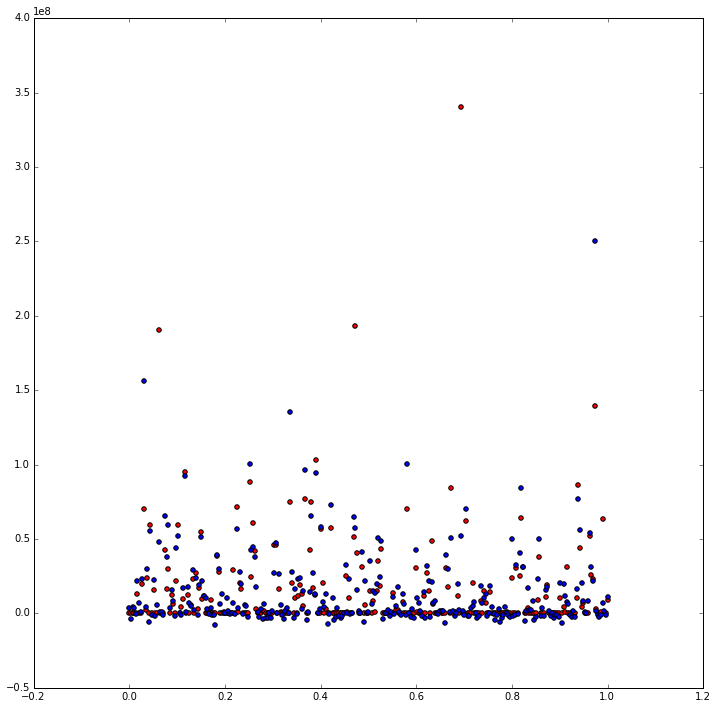

In [884]:
x = np.linspace(0,1,len(y_test))
fig = plt.figure(figsize=(12,12))
plt.scatter(x,y_test,c='r')
plt.scatter(x,y_pred,c='b')
plt.show()

In [1169]:
def rerank(x):
    return x*500
X['rank'] = X['rank'].apply(rerank)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
params = {'max_depth': 5, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

/Users/tianhong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=5, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=1,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

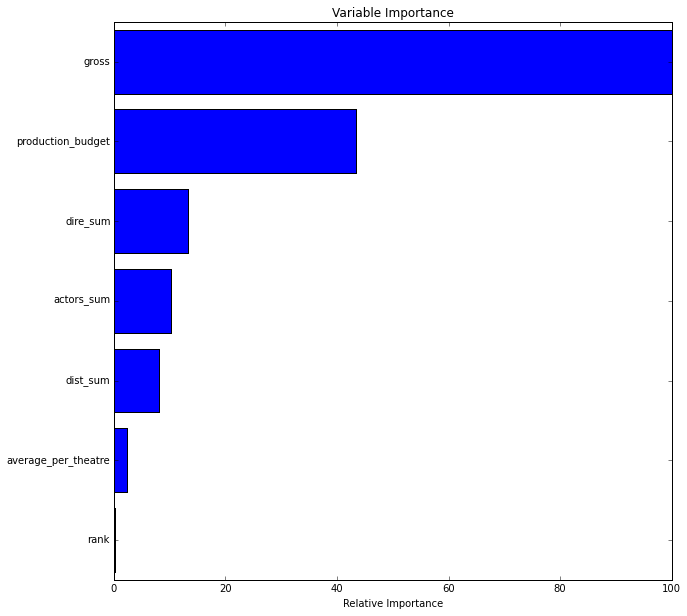

In [1170]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
fig = plt.figure(figsize = (10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [1171]:
data = [go.Bar( x=X_train.columns[sorted_idx],
            y=feature_importance[sorted_idx]    )]
py.iplot(data, filename='Feature Importance')

In [1077]:
clf.score(X_test,y_test)

0.54340642578729259

In [893]:
X1=sm.add_constant(X)
model = sm.OLS(y,X1)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                 gross2   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     217.6
Date:                Thu, 30 Jun 2016   Prob (F-statistic):               0.00
Time:                        08:49:03   Log-Likelihood:                -53817.
No. Observations:                2947   AIC:                         1.077e+05
Df Residuals:                    2925   BIC:                         1.078e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.441e+06   1

In [1356]:
def rerank(x):
    return math.sqrt(x)

# clusters

X = pd.concat([dfnumbers,dfgenre,dfmpaa,dfactors,dfdire,dfdist,dfyears],axis =1)
y = dfall[['gross2']]
Xy = pd.concat([X,y],axis = 1)
X = Xy[Xy['Sci-Fi'] ==1 ]
#X = X[X['average_per_theatre']<10000]
y=X[['gross2']]
X = X[['average_per_theatre','gross','production_budget','rank','actors_sum','dire_sum','dist_sum','release_year']]
X.fillna(0,inplace=True)
#X['rank'] = X['rank'].apply(rerank)


In [1367]:
X1=sm.add_constant(X)
model = sm.OLS(y,X1)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                 gross2   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     11.06
Date:                Fri, 01 Jul 2016   Prob (F-statistic):           2.20e-10
Time:                        11:56:54   Log-Likelihood:                -1705.9
No. Observations:                  89   AIC:                             3430.
Df Residuals:                      80   BIC:                             3452.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.215e+07    

In [1368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print regr.score(X_test,y_test)

0.698342825466


In [1369]:
(math.sqrt(mean_squared_error(y_test,y_pred)) / y_test.mean())

gross2    0.735885
dtype: float64

In [1373]:
trace1 = go.Scatter(
    x=['Action','Drama','Romance','Comedy','Documentary','Animation','Foreign','Horror','Scifi'],
    y=[0.796,0.865,0.785,0.78,3.23,.66,1.5,1.087,.736],
    
    connectgaps=True
)
data = [trace1]

fig = dict(data=data)
py.iplot(fig, filename='genre')


In [1120]:
data1 = y_pred - y_test
#data1 = data1.as_matrix()
#data1 = np.sort(data1,axis=None)
data1 = data1[10:210]

In [1103]:
data2 = y_pred - y_test
data2 = data2.as_matrix()

In [1138]:
data3 = y_pred - y_test
data3 = data3.as_matrix()

In [1150]:
data4 = y_pred - y_test
data4 = data4.as_matrix()

In [1107]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('hongtian22', 'qoubvge4x3')

In [1159]:
trace0 = go.Box(y=data1,
    name = '>10000',
    marker = dict(
        color = 'rgb(214, 12, 140)',))

In [1160]:
trace1 = go.Box(y=data2,
    name = '<1000',
    marker = dict(
        color = 'rgb(0, 128, 128)',))

In [1163]:
trace2 = go.Box(y=data3,
    name = '1000< X < 5000',
    marker = dict(
        color = 'rgb(8, 81, 156)',))

In [1162]:
trace3 = go.Box(y=data4,
    name = '5000< X < 10000',
    marker = dict(
        color = '#FF851B',))

In [1156]:
data3 = np.sort(data3,axis=None)[10:-10]

In [1164]:
data = [trace1,trace2,trace3,trace0]
py.iplot(data)

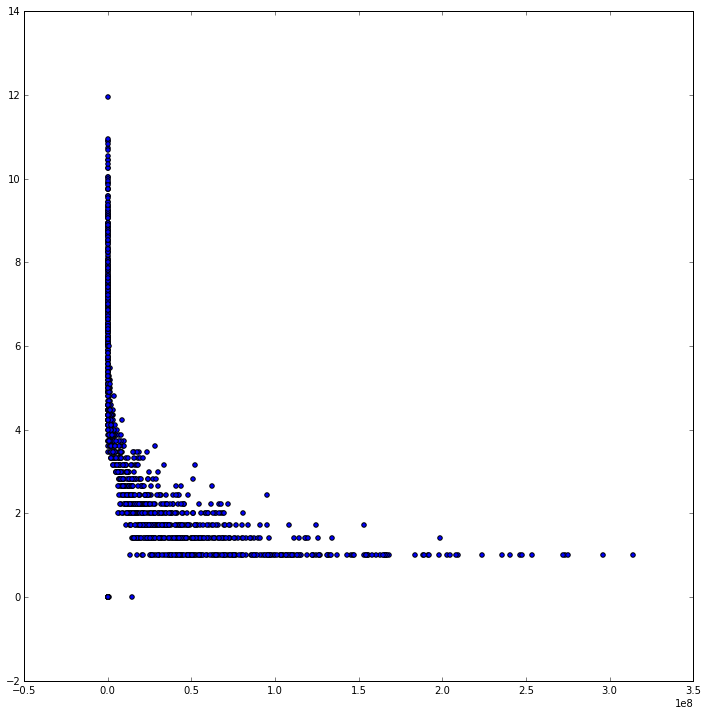

In [1033]:
fig = plt.figure(figsize = (12,12))
plt.scatter(X['gross'],X['rank'])